In [148]:

#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import pandas as pd #gives us DataFrames


import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy
import nltk
from spacy import displacy
#Using NLP in spanish
nlp = spacy.load("es_core_news_sm")

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile



#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



In [77]:
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw


def clean_raw_text(raw_texts, encoding):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode(encoding)
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts


def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized


def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)


def getGithubFiles(target, maxFiles = 100):
    #We are setting a max so our examples don't take too long to run
    #For converting to a DataFrame
    releasesDict = {
        'name' : [], #The name of the file
        'text' : [], #The text of the file, watch out for binary files
        'path' : [], #The path in the git repo to the file
        'html_url' : [], #The url to see the file on Github
        'download_url' : [], #The url to download the file
    }

    #Get the directory information from Github
    r = requests.get(target)
    filesLst = json.loads(r.text)

    for fileDict in filesLst[:maxFiles]:
        #These are provided by the directory
        releasesDict['name'].append(fileDict['name'])
        releasesDict['path'].append(fileDict['path'])
        releasesDict['html_url'].append(fileDict['html_url'])
        releasesDict['download_url'].append(fileDict['download_url'])

        #We need to download the text though
        text = requests.get(fileDict['download_url']).text
        releasesDict['text'].append(text)

    return pandas.DataFrame(releasesDict)


def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized



def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags



def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences



def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents


def bigramScoring(count, wordsTuple, total):
    return count


def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank


def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents


def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()


def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic


def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)


In [246]:
from os import listdir
from os.path import isfile, join

text_folder = 'txt'

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

For this exercise i will explore the corpora created for the project that my group will be working for the rest of the quarter. We want to analyze the presidential speeches of peruvian presidents and for the following assignment i will be working with the speeches that each peruvian president, from 2001 to 2019, has addressed annually to the peruvian people during the independence day. 


Creating the necessary data structure to perform our analysis

In [247]:
text_dic = {}
onlyfiles = [f for f in listdir(text_folder) if isfile(join(text_folder, f))]

for file in onlyfiles:
    f = open(text_folder + '/' + file, "r")
    text_dic[file] = {}
    text_dic[file]['name'] = file
    text_dic[file]['text'] = f.read()
    
#Using the modified version of clean_raw_text function, incorporating it into my own code, we build 
#the lists of tokenized texts for every speech
for index, data in text_dic.items():
    text_dic[index]['clean_text'] = text_dic[index]['text'].replace(" \'m", "'m") \
        .replace(" \'ll", "'ll").replace(" \'re", "'re") \
        .replace(" \'s", "'s").replace(" \'re", "'re")\
        .replace("\n", "").replace("\x0c", "")
    text_dic[index]['token_word_list'] = word_tokenize(text_dic[index]['clean_text'])

For the word counter i want to check all the presidential speeche. We see in this initial phase that the most common words are stop words ones like "de", "la" and "y" in spanish



In [36]:
bigger_lst = []

for index, data in text_dic.items():
    bigger_lst+=text_dic[index]['token_word_list']
    
#Counting the words and stablishing a sort.    
countedWords = wordCounter(bigger_lst)
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,word,count
9,de,11567
19,la,6474
24,y,6432
5,el,5302
31,en,4893
47,que,3963
68,a,3459
39,los,3027
13,del,2432
55,para,2158


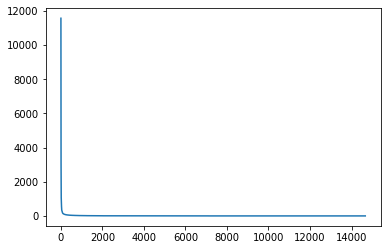

In [24]:
#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

Normalized meassure of seen above

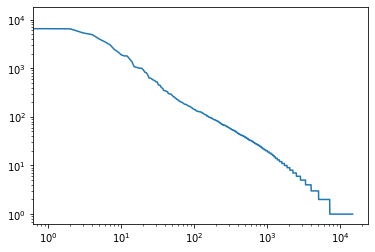

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Here i check the context in which the word "gracias" or thanks appear in the text. Sometimes the president thanks GOD, the peruvian people, or cetain actions that lead to desired outcomes.

In [31]:
whText = nltk.Text(bigger_lst)

graciasIndex = nltk.text.ConcordanceIndex(whText) 
graciasIndex.print_concordance('gracias')


Displaying 25 of 60 matches:
e electricidad de las zonas rurales gracias a lo cual se verán reducidas las ta
que Dios bendiga al Perú muchísimas gracias a todos ustedes la erradicación de 
derúrgica de Chimbote se reactivará gracias a nuevas inversiones con más empleo
irlo con claridad desconfianza pero gracias a la voluntad y las enormes capacid
ndanos mandarinas palta hass y uvas gracias al cumplimiento de protocolos fitos
n esta exitosa senda de crecimiento gracias a los catorce proyectos de 5 ley ap
perada por los Juegos Olímpicos Hoy gracias al apoyo y aporte de todos los que 
o de mayor demanda del país y ahora gracias a su digitalización el certificado 
disciplinarias de jueces y fiscales gracias a la Autoridad Nacional de Integrid
enciosos administrativos judiciales gracias a la eliminación de la emisión del 
a y Acceso a la Información Pública gracias a la implementación de un procedimi
cia el Perú del Bicentenario Muchas gracias 28 MENSAJE DEL PRESIDENTE CONSTITUC
 de tierra 

I take a look at the context of the word "trust".

In [32]:
whText.common_contexts(['confianza'])

la_ciudadana da_para la_2mi y_al mi_y y_que de_sobre la_que la_de
la_solicitada con_y y_porque la_la de_hemos de_confianza confianza_en
de_por mi_en tener_además la_en


I count how many times the word presidency or presidencia appears in the text

In [33]:
whText.count('presidencia')

6

The following set of words occur multiple times.

//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
//anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib

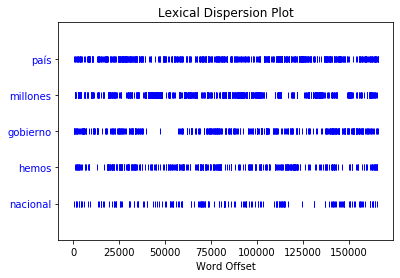

In [37]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
whText.dispersion_plot(['país', 'millones', 'gobierno', 'hemos', 'nacional'])
sns.set() #Re-enabling seaborn

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

First we create the dictionary that is associated with the counting words 

In [43]:
countsDict = {}
for word in bigger_lst:
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:40]

[('de', 11476),
 ('y', 6215),
 ('la', 6107),
 ('el', 4795),
 ('en', 4319),
 ('que', 3948),
 ('a', 3346),
 ('los', 2939),
 ('del', 2372),
 ('para', 1993),
 ('las', 1797),
 ('con', 1695),
 ('se', 1586),
 ('un', 1486),
 ('por', 1139),
 ('más', 1050),
 ('mil', 1013),
 ('una', 960),
 ('es', 944),
 ('al', 939),
 ('millones', 924),
 ('ha', 792),
 ('no', 691),
 ('país', 627),
 ('Perú', 607),
 ('este', 605),
 ('año', 591),
 ('En', 571),
 ('como', 524),
 ('su', 513),
 ('lo', 505),
 ('El', 468),
 ('Estado', 420),
 ('han', 405),
 ('gobierno', 403),
 ('sus', 391),
 ('hemos', 387),
 ('todos', 357),
 ('La', 354),
 ('años', 348)]

In [44]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'millones':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

['de',
 'y',
 'la',
 'el',
 'en',
 'que',
 'a',
 'los',
 'del',
 'para',
 'las',
 'con',
 'se',
 'un',
 'por',
 'más',
 'mil',
 'una',
 'es',
 'al']

In [48]:
df_text = pd.DataFrame(text_dic)
df_text = df_text.T 

mensaje-2004-at.txt             [DOCTOR, ALEJANDRO, TOLEDO, MANRIQUE, ANTE, EL...
mensaje-2006-ag.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2019-01-vizcarra.txt    [DISCURSO, DEL, PRESIDENTE, CONSTITUCIONAL, DE...
mensaje-2014-oh.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2008-ag.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2002-at.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2010-ag.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2012-oh.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2007-ag.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2005-at.txt             [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2018-4.txt              [DISCURSO, DEL, PRESIDENTE, CONSTITUCIONAL, DE...
mensaje-2017-ppk.txt            [MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...
mensaje-2016-ppk

In [49]:
df_text['normalized_tokens'] = df_text['token_word_list'].apply(lambda x: normalizeTokens(x))
df_text['normalized_tokens_count'] = df_text['normalized_tokens'].apply(lambda x: len(x))



When we have the tags or clusters associated, we will calculate the conditional frequency distribution with more meaningful results, right now i will follow the example

In [250]:
#.sum() adds together the lists from each row into a single list
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in df_text['normalized_tokens'].sum()))
#print the number of words
print(whcfdist.N())

81581


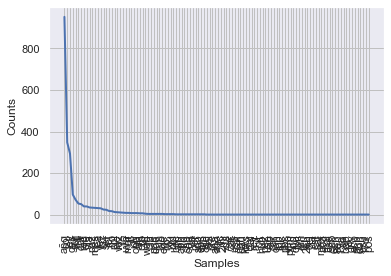

In [251]:
whcfdist[3].plot()

Creating the conditional probability distribution 

In [252]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(whcpdist[2].max())

#And its probability
print(whcpdist[2].prob(whcpdist[2].max()))

fe
0.20229007633587787


In [65]:
df_text['normalized_tokens_POS'] = [spacy_pos(t) for t in df_text['text']]

In [80]:
df_text_WordtoPOS = nltk.ConditionalFreqDist(df_text['normalized_tokens_POS'].sum())
list(df_text_WordtoPOS.items())[:20]

[('doctor', FreqDist({'PROPN___': 13})),
 ('alejandro', FreqDist({'PROPN___': 10})),
 ('toledo', FreqDist({'PROPN___': 5})),
 ('manrique', FreqDist({'PROPN___': 5})),
 (',', FreqDist({'PUNCT__PunctType=Comm': 10306})),
 ('\n\n', FreqDist({'_SP': 863})),
 ('ante', FreqDist({'ADP__AdpType=Prep': 141})),
 ('el',
  FreqDist({'DET__Definite=Def|Gender=Masc|Number=Sing|PronType=Art': 5365, 'DET__Gender=Masc|Number=Sing|PronType=Art': 12})),
 ('congreso',
  FreqDist({'PROPN___': 162, 'NOUN__Gender=Masc|Number=Sing': 73, 'ADJ__Gender=Masc|Number=Sing': 1})),
 ('nacional', FreqDist({'ADJ__Number=Sing': 304, 'PROPN___': 170})),
 ('28',
  FreqDist({'NUM__NumForm=Digit|NumType=Card': 44, 'NUM__NumForm=Digit': 14})),
 ('de', FreqDist({'ADP__AdpType=Prep': 11698})),
 ('julio', FreqDist({'NOUN___': 55, 'NOUN__AdvType=Tim': 35})),
 ('20041', FreqDist({'NUM__NumForm=Digit|NumType=Card': 1})),
 ('mensaje', FreqDist({'NOUN__Gender=Masc|Number=Sing': 44})),
 ('del', FreqDist({'ADP__AdpType=Preppron|Gender

One thing that is certainly interesting, is how different the POS tagging is in Spanish with respect to english. To follow with the analyses, i used the masculine adjective in plural because it can describe multiple states from the speech.

In [70]:
df_txt_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in df_text['normalized_tokens_POS'].sum())

In [87]:
# i have the pressumption that in spanish the POS is a little more different and 
#that's why the adjectives come with gender and number.
df_txt_POStoWord['ADJ__Gender=Masc|Number=Plur|VerbForm=Part']

FreqDist({'privados': 17, 'poblados': 16, 'convencidos': 13, 'asegurados': 12, 'descentralizados': 11, 'sueldos': 10, 'destinados': 9, 'despedidos': 7, 'especializados': 6, 'olvidados': 6, ...})

In [91]:
df_txt_POStoWord['ADJ__Gender=Masc|Number=Plur|VerbForm=Part'].most_common(5)


[('privados', 17),
 ('poblados', 16),
 ('convencidos', 13),
 ('asegurados', 12),
 ('descentralizados', 11)]

Looking at the word cloud, it is not so surprising that the most popular words are pais (country), Peru (as in the country), and anio (year in spanish). These results make a lot of sense regarding the topic that presidents address each year.

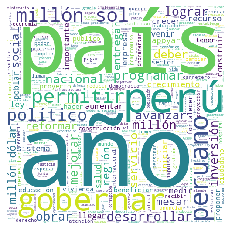

In [92]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(df_text['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("speeches_word_cloud.pdf", format = 'pdf')

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?</span>

For this part i will take the speeches that are the inaugural ones, from all the presidents, from 2001 to 2019. That leaves us with five speeches
    
    
  

In [260]:
mask = (df_text['name'] == 'mensaje-2001-at.txt')|(df_text['name'] == 'mensaje-2006-ag.txt')|(df_text['name'] == 'mensaje-2011-oh.txt')|(df_text['name'] == 'mensaje-2016-ppk.txt')
new_df = df_text[mask]

In [261]:
new_df['sentences'] = new_df['clean_text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
new_df.index = range(len(new_df) - 1, -1,-1) #Reindex to make things nice in the future
new_df

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,text,clean_text,token_word_list,normalized_tokens,normalized_tokens_count,normalized_tokens_POS,sentences
3,mensaje-2006-ag.txt,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, co...",5169,"[(mensaje, NOUN__Gender=Masc|Number=Sing), (de...","[[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DE..."
2,mensaje-2016-ppk.txt,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, pe...",1470,"[(mensaje, NOUN__Gender=Masc|Number=Sing), (de...","[[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DE..."
1,mensaje-2011-oh.txt,\n\nMENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL...,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PER...,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, co...",2156,"[( \n\n, _SP), (mensaje, NOUN__Gender=Masc|Num...","[[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DE..."
0,mensaje-2001-at.txt,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,MENSAJE DEL PRESIDENTE CONSTITUCIONAL DEL PERÚ...,"[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DEL...","[mensaje, presidente, constitucional, perú, do...",2297,"[(mensaje, NOUN__Gender=Masc|Number=Sing), (de...","[[MENSAJE, DEL, PRESIDENTE, CONSTITUCIONAL, DE..."


We perform the POS tagging with Spacy, that has a nice package for doing NLP in spanish. We proceed to do check, for example, how the first speech was tagged

In [106]:
new_df['POS_sents'] = new_df['sentences'].apply(lambda x: tag_sents_pos(x))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [296]:
#new_df['POS_sents'][0]

We check how the nouns in masculine, singular gender are distributed in the following example

In [109]:
countTarget = 'NOUN__Gender=Masc|Number=Sing'
targetCounts = {}
for entry in new_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('país', 78),
 ('empleo', 42),
 ('pueblo', 33),
 ('sistema', 28),
 ('trabajo', 27),
 ('desarrollo', 23),
 ('derecho', 17),
 ('compromiso', 16),
 ('gobierno', 16),
 ('decreto', 16),
 ('deber', 15),
 ('proyecto', 14),
 ('nivel', 14),
 ('objetivo', 14),
 ('crecimiento', 12),
 ('cambio', 12),
 ('anuncio', 12),
 ('año', 11),
 ('día', 11),
 ('turismo', 11)]

Analyzing the dependencies of the word democratico (or democratic), we see that the only adjective, not even a noun, associated with it is the word national (or nacional). There are many time variants, as well as gender and number of people in spanish that we will have to address when analyzing sentences in spanish.

In [124]:
NTarget = 'ADJ__Number=Sing'
Word = 'democrático'
NResults = set()
for entry in new_df['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults) 

{'nacional'}


In [131]:
#countTarget = 'VERB__Mood=Ind|Number=Plur|Person=1|Tense=Fut|VerbForm=Fin'
countTarget = 'ADJ__Number=Sing'
targetCounts = {}
for entry in new_df['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('social', 40),
 ('nacional', 23),
 ('mayor', 20),
 ('gran', 20),
 ('enorme', 6),
 ('regional', 6),
 ('rural', 6),
 ('internacional', 6),
 ('posible', 6),
 ('mejor', 5),
 ('fundamental', 5),
 ('mundial', 5),
 ('principal', 5),
 ('potable', 5),
 ('firme', 5),
 ('importante', 4),
 ('responsable', 4),
 ('central', 4),
 ('gradual', 4),
 ('exterior', 4)]

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 
    
For doing the following exercise, i will use the code that i found from https://stackoverflow.com/questions/8683588/understanding-nltk-collocation-scoring-for-bigrams-and-trigrams, where i learned that i have to train my predictor with the corpora from my work. From doing so, i get the following results:

In [268]:
import collections
bgm    = nltk.collocations.BigramAssocMeasures()

speeches_Bi = nltk.collocations.BigramCollocationFinder.from_words(df_text['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(speeches_Bi.N))

There are 81581 bigrams in the finder


I get very interesting results: for the word mensaje, or message, i get that the most likely word to appear next is presidente (or president), next, optimismo (or optimism), and reiterar (or reiterate). We can apply this same technique to trigrams, ngrams, etc

In [269]:
#print(speeches_Bi.nbest(bigramScoring, 10))
scored = speeches_Bi.score_ngrams( bgm.likelihood_ratio  )

# Group bigrams by first word in bigram.                                        
prefix_keys = collections.defaultdict(list)
for key, scores in scored:
    prefix_keys[key[0]].append((key[1], scores))

# Sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

In [271]:
print ('mensaje', prefix_keys['mensaje'][:5])

mensaje [('presidente', 147.21497767232356), ('optimismo', 17.33203260557966), ('reiterar', 16.71804724052496), ('nacion-28jul2017.pdf', 15.02775478909999), ('pidiéndoles', 15.02775478909999)]


In [136]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

speeches_Bi.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  12, The second word is: 10
The first word is:  10, The second word is: 5
The first word is:  5, The second word is: 5
The first word is:  5, The second word is: 229
The first word is:  229, The second word is: 488
The first word is:  488, The second word is: 89
The first word is:  89, The second word is: 45
The first word is:  45, The second word is: 195
The first word is:  195, The second word is: 48
The first word is:  48, The second word is: 625


These are the most common bigrams in our text. Interestingly enough, the first two phrases talk about mone (millions of soles and millions of dollars). It is the case that presidential speeches in Peru are a mechanism of accountability about how much money has been spent in what during the year.

In [137]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
speeches_Bi.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('millón', 'sol'), 2029.28804556261),
 (('millón', 'dólar'), 1263.619023003015),
 (('y', 'y'), 1000.455180709615),
 (('gobierno', 'regional'), 755.791384407517),
 (('fuerza', 'armar'), 725.9080492259316),
 (('aguar', 'potable'), 671.4318070664488),
 (('señor', 'presidente'), 607.8754189446961),
 (('proyectar', 'ley'), 548.3388908825852),
 (('américa', 'latino'), 440.9932011901309),
 (('invertir', 'millón'), 391.0682423405413),
 (('llegar', 'a'), 376.42467081407995),
 (('congreso', 'república'), 374.349109672209),
 (('beneficiar', 'a'), 368.9156752953107),
 (('inclusión', 'social'), 310.7415258325145),
 (('a', 'y'), 306.94579990135503),
 (('seguridad', 'ciudadano'), 304.69919999918886),
 (('santo', 'martín'), 300.4205227665632),
 (('seguro', 'integral'), 285.6544798279234),
 (('nivel', 'nacional'), 283.53865873688034),
 (('poner', 'marchar'), 273.482819308597),
 (('decretar', 'supremo'), 272.8967363228664),
 (('madre', 'dios'), 270.36823556675256),
 (('integral', 'salud'), 267.4112649

In [138]:
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

These are the most common trigrams from our texts. One interesting thing is that y (and) hasn't been cleaned yet as a stop word. This trigram will definitely be changed once that cleaning is done. (I took a look at the default stop words from the Spacy package for spanish and it eliminates words that can be substantial for this project, this is why i haven't used the package yet).

In [139]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
speeches_Tri = nltk.collocations.TrigramCollocationFinder.from_words(df_text['normalized_tokens'].sum())
speeches_Tri.score_ngrams(trigram_measures.student_t)[:20]

[(('peruano', 'y', 'peruano'), 6.890484761360826),
 (('a', 'nivel', 'nacional'), 6.4762401490376735),
 (('gobierno', 'regional', 'y'), 6.161025159414662),
 (('inversión', 'millón', 'sol'), 6.07984437681761),
 (('invertir', 'millón', 'sol'), 5.476307209383942),
 (('señor', 'y', 'señor'), 5.470516284772774),
 (('seguro', 'integral', 'salud'), 5.385076654673982),
 (('niño', 'y', 'niño'), 5.379978397318382),
 (('millón', 'sol', 'y'), 5.32739645696808),
 (('regional', 'y', 'local'), 5.289035195087201),
 (('amigo', 'y', 'amigo'), 4.794872117710211),
 (('aguar', 'potable', 'y'), 4.794207324792195),
 (('región', 'y', 'municipio'), 4.792857184582825),
 (('llevar', 'a', 'cabo'), 4.471953964267112),
 (('a', 'gobierno', 'regional'), 4.469623878580034),
 (('señor', 'presidente', 'congreso'), 4.358598785587205),
 (('congreso', 'nacional', 'julio'), 4.358556104349746),
 (('fuerza', 'armar', 'y'), 4.357797029860024),
 (('millón', 'dólar', 'y'), 4.20429249849031),
 (('millón', 'sol', 'a'), 4.2032079215

Here i replicate the dictionary of ngrams that the code gave us by default. We, in the future, may decide to eliminate more cases based on occurence (Now it is set at 2, but 3 or 4 would also make sense).

In [295]:
Ngrams = nltk.ngrams(df_text['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
#print(Filtered)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.</span>

The most important challenge for the analysis of our corpus is the fact that it is in Spanish. Mostly locations (LOC) are correctly classified (Brasil, el Peru, America, La Haya, Chile). But most local references like FF.AA (armed forces in spanish) are hard to classify. Even a significant part of our contribution would be to correctly label the entities and contribute to the Spacy's NLP!

In [275]:
new_df['classified_sents'] = new_df['sentences'].apply(lambda x: tag_sents_ner(x))
new_df['classified_sents']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3    [[(MENSAJE, ORG), (PRESIDENTE CONSTITUCIONAL, ...
2    [[(MENSAJE, ORG), (PRESIDENTE CONSTITUCIONAL, ...
1    [[(MENSAJE, ORG), (PRESIDENTE CONSTITUCIONAL, ...
0    [[(MENSAJE, ORG), (PRESIDENTE CONSTITUCIONAL, ...
Name: classified_sents, dtype: object

[[('MENSAJE', 'ORG'),
  ('PRESIDENTE CONSTITUCIONAL', 'MISC'),
  ('CONGRESO NACIONAL', 'MISC'),
  ('JULIO', 'MISC'),
  ('OLLANTA HUMALA TASSO Recibo', 'MISC'),
  ('Presidente de la República Declaro', 'MISC'),
  ('Congreso', 'ORG'),
  ('Estado de Derecho', 'LOC'),
  ('Perú', 'LOC'),
  ('Exigiré', 'PER'),
  ('Ejecutivo La', 'ORG'),
  ('Queremos', 'MISC'),
  ('Asumiré', 'PER'),
  ('Víctor Andrés Belaúnde', 'PER'),
  ('Universidad Nacional Mayor de San Marcos lanzó', 'ORG'),
  ('Queremos Patria Esta', 'MISC'),
  ('José Carlos Mariátegui', 'PER'),
  ('Víctor Raúl Haya de la Torre', 'PER'),
  ('Esa reivindicación de la Patria y de la Nación', 'MISC'),
  ('República', 'MISC'),
  ('La Patria', 'MISC'),
  ('Historia común', 'MISC'),
  ('Por ello todos nos sentimos orgullosos de nuestra', 'MISC'),
  ('Esta aspiración a una Patria inclusiva', 'MISC'),
  ('Para hacerla posible', 'MISC')],
 [('aquí 1 Fuente Diario Oficial El Peruano', 'MISC'),
  ('Asumo', 'MISC'),
  ('Por ellos y para ellos voy a 

In [143]:
entityCounts = {}
for entry in new_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('Estado', 40),
 ('Perú', 35),
 ('Congreso', 9),
 ('Nuestra', 9),
 ('Lima', 9),
 ('El Perú', 7),
 ('Presidente', 7),
 ('Vamos', 6),
 ('El Estado', 5),
 ('Además', 5)]

In [272]:
[x[0] for x in sortedEntities if x[1] == 9]

['Congreso', 'Nuestra', 'Lima']

In [145]:
nonObjCounts = {}
for entry in new_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('Estado', 40),
 ('Perú', 35),
 ('Nuestra', 9),
 ('Lima', 9),
 ('El Perú', 7),
 ('Presidente', 7),
 ('Vamos', 6),
 ('El Estado', 5),
 ('Además', 5),
 ('Queremos', 5)]

Most definitely, locations are the ones that have the most precision and recall. Judging for the first 36 entries, i calculated the precision (26 right out of 36), which is .72. The recall is difficult to calculate in this case because we would need to label the False negatives, which are too many cases. 

In [279]:
LocCounts = {}
for entry in new_df['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'LOC':
                print(ent)

Estado autoridades Señora Presidenta
Perú Ciento
Perú
Brasil
Bolivia
Chile
Ecuador
El Salvador
Alteza
Príncipe de Asturias
Relaciones Exteriores
Mercado Común Sudamericano Esta
Estado
Estado por
Perú
Piérola
Estado Pero
Estado
Señores
Estado
Perú
Sudamérica
Perú
Europa
Sudamérica
Estados Unidos
Asia
Estado
Lima
Lima
Perú Pero
Estado
Estado debe
Estado
Estado
El Perú
Estado
Perú
Estado
Estado
Perú
Estado Hablo
Estado
Estado
Palacio de Gobierno
Perú
Estado
Estado
Gobierno La
Palacio de Gobierno Encuentro
Palacio
Anta
el Cusco
Comencemos
El Perú
Canal de Tinajones
Lambayeque
Entrego
Hospital Las Mercedes
Chiclayo
Piura
Lagunillas
Piura
Estado
Hablo
Perú
Puno
Consejo de Ministros
Estado
Estado
Austeridad
Austeridad
Sistema Nacional de Inversión Pública SNIP
Gobierno Central
Gobierno Central
Estado
Lima
Comité Local de Gestión Educativa
Naturalmente
Estado
Gobierno Central
De
Banco de Materiales
Región Inca
Lima
Cusco
Estado
Entrego
Habrá
Congreso propuestas
El Estado
Estado
Estado Te
Estad

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?
    
The following cells contain the analysis i make from the phrase in the very next line:

In [178]:
df_text['clean_text'][0][337:451]

'reiterar mi felicitación al nuevo Presidente del Congreso y los  Vicepresidentes,  por  su  elección  democrática '

In [179]:
doc = nlp(df_text['clean_text'][0][337:451])

In [180]:
displacy.render(doc, style='dep')

"mi felicitacion" is the object of "reiterar".  
also, "Presidente" is the object of reiterar.  
also, "Congreso" is the nominal modifier of the "Presidente"  
"presidente" and "Vicepresidentes" have are both conjunctions.  
actually, "su eleccion" shouldn't be an appositional modifier of the "presidente"

In [181]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

mi felicitación felicitación obj reiterar
Presidente Presidente obj reiterar
Congreso Congreso nmod Presidente
los  Vicepresidentes Vicepresidentes conj Presidente
su  elección elección appos Presidente


In [182]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

reiterar ROOT reiterar VERB [felicitación, Presidente]
mi det felicitación NOUN []
felicitación obj reiterar VERB [mi]
al case Presidente PROPN []
nuevo amod Presidente PROPN []
Presidente obj reiterar VERB [al, nuevo, Congreso, Vicepresidentes, elección]
del case Congreso PROPN []
Congreso nmod Presidente PROPN [del]
y cc Vicepresidentes PROPN []
los det Vicepresidentes PROPN [ ]
   los DET []
Vicepresidentes conj Presidente PROPN [y, los]
, punct elección NOUN [ ]
   , PUNCT []
por case elección NOUN [ ]
   por ADP []
su det elección NOUN [ ]
   su DET []
elección appos Presidente PROPN [,, por, su,  , democrática]
   elección NOUN []
democrática amod elección NOUN []


In [195]:
for palabra in doc.noun_chunks:
    print(palabra.root.text,'su conector es: ', palabra.root.head.text)

felicitación su conector es:  reiterar
Presidente su conector es:  reiterar
Congreso su conector es:  Presidente
Vicepresidentes su conector es:  Presidente
elección su conector es:  Presidente


The meaning of this tree is yet to be disentangled

In [206]:
doc = nlp('Señor  Presidente,  hoy  vengo  a  este  Poder  del  Estado  como  Presidente Constitucional  de  la  República  y  como  ciudadano  a  rendir  cuentas  de  nuestra gestión.  No  obstante,  no  puedo  hacer  ningún  recuento  de  lo  realizado  sin  abordar previamente el problema de la corrupción: la de antes y de ahora, la de dentro y la de fuera.   No  sólo  vengo  a  exigir  con  energía  resultados  concretos  en  la  lucha  contra  la corrupción de la década pasada. También entiendo que lo central en la lucha contra la corrupción se sostiene en el ejemplo y la confianza ciudadana')
root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

Señor nsubj 0 5 ['rendir']
   0 0 ['Señor', 'rendir']
Presidente flat 0 0 ['Señor', 'rendir']
, punct 0 2 ['Señor', 'rendir']
   0 0 [',', 'Señor', 'rendir']
hoy advmod 0 1 [',', 'Señor', 'rendir']
   0 0 ['hoy', ',', 'Señor', 'rendir']
vengo appos 0 2 ['Señor', 'rendir']
   0 0 ['vengo', 'Señor', 'rendir']
a case 0 1 ['Poder', 'vengo', 'Señor', 'rendir']
   0 0 ['a', 'Poder', 'vengo', 'Señor', 'rendir']
este det 0 1 ['Poder', 'vengo', 'Señor', 'rendir']
   0 0 ['este', 'Poder', 'vengo', 'Señor', 'rendir']
Poder obl 2 2 ['vengo', 'Señor', 'rendir']
   0 0 ['Poder', 'vengo', 'Señor', 'rendir']
del case 0 1 ['Estado', 'Poder', 'vengo', 'Señor', 'rendir']
   0 0 ['del', 'Estado', 'Poder', 'vengo', 'Señor', 'rendir']
Estado flat 1 1 ['Poder', 'vengo', 'Señor', 'rendir']
   0 0 ['Estado', 'Poder', 'vengo', 'Señor', 'rendir']
como mark 0 1 ['Presidente', 'Señor', 'rendir']
   0 0 ['como', 'Presidente', 'Señor', 'rendir']
Presidente appos 1 3 ['Señor', 'rendir']
Constitucional flat 0 1 ['Pres

In [207]:
span = doc[doc[4].left_edge.i : doc[4].right_edge.i+1]
with doc.retokenize() as retokenizer:
    retokenizer.merge(span)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

Señor NOUN nsubj rendir
  SPACE  Señor
Presidente PROPN flat Señor
, PUNCT punct Señor
  SPACE  ,
hoy ADV advmod ,
  SPACE  hoy
vengo VERB appos Señor
  SPACE  vengo
a ADP case Poder
  SPACE  a
este DET det Poder
  SPACE  este
Poder PROPN obl vengo
  SPACE  Poder
del ADP case Estado
  SPACE  del
Estado PROPN flat Poder
  SPACE  Estado
como SCONJ mark Presidente
  SPACE  como
Presidente PROPN appos Señor
Constitucional PROPN flat Presidente
  SPACE  Constitucional
de ADP case República
  SPACE  de
la DET det República
  SPACE  la
República PROPN flat Presidente
  SPACE  República
y CONJ cc ciudadano
  SPACE  y
como SCONJ mark ciudadano
  SPACE  como
ciudadano ADJ conj Presidente
  SPACE  ciudadano
a ADP mark rendir
  SPACE  a
rendir VERB ROOT rendir
  SPACE  rendir
cuentas NOUN obj rendir
  SPACE  cuentas
de ADP case gestión
  SPACE  de
nuestra DET det gestión
gestión NOUN nmod cuentas
. PUNCT punct rendir
  SPACE  .
No ADV advmod hacer
  SPACE  No
obstante NOUN fixed No
, PUNCT punct N

In [208]:
displacy.render(doc, style='dep')

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 
    
 I applied the following divergences: KL, Chi squared and Wasserstein. They reveal a lot of information, let's see:

I make a comparison between the speeches of two important ex presidents from Peru: Alejandro Toledo and Alan Garcia. Also, for calculating the Jensen Shannon Divergence we should calculate the average of the two distributions. It is clear that the relationship of the KL and JS is directly proportional and it is a way of weigthting each cross interaction, in a way that the interaction is simmetric and finite.  
On a side note, at means Alejandro Toledo and ag means Alan Garcia

In [283]:
mask_toledo = (df_text['name'] == 'mensaje-2001-at.txt')|(df_text['name'] == 'mensaje-2002-at.txt')|(df_text['name'] == 'mensaje-2003-at.txt')|(df_text['name'] == 'mensaje-2004-at.txt')|(df_text['name'] == 'mensaje-2005-at.txt')
mask_alan = (df_text['name'] == 'mensaje-2006-ag.txt')|(df_text['name'] == 'mensaje-2007-ag.txt')|(df_text['name'] == 'mensaje-2008-ag.txt')|(df_text['name'] == 'mensaje-2009-ag.txt')|(df_text['name'] == 'mensaje-2010-ag.txt') 

mask_alan_toledo = (df_text['name'] == 'mensaje-2006-ag.txt')|(df_text['name'] == 'mensaje-2007-ag.txt')|(df_text['name'] == 'mensaje-2008-ag.txt')|(df_text['name'] == 'mensaje-2009-ag.txt')|(df_text['name'] == 'mensaje-2010-ag.txt')| \
(df_text['name'] == 'mensaje-2001-at.txt')|(df_text['name'] == 'mensaje-2002-at.txt')|(df_text['name'] == 'mensaje-2003-at.txt')|(df_text['name'] == 'mensaje-2004-at.txt')|(df_text['name'] == 'mensaje-2005-at.txt')




toledo_words = set(df_text[mask_toledo]['normalized_tokens'].sum())
alan_words = set(df_text[mask_alan]['normalized_tokens'].sum())
alan_toledo_words = set(df_text[mask_alan_toledo]['normalized_tokens'].sum())

finding all the common words and removing those not found in both, and assign the remaining ones indices.

In [288]:
overlapWords = toledo_words & alan_words
allWords = toledo_words | alan_words



overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['presidente']

allWordsDict = {word: index for index, word in enumerate(allWords)}
allWordsDict['presidente']

4214

Making the array of probabilities (which are faster)

In [292]:
toledo_ProbArray = makeProbsArray(df_text[mask_toledo]['normalized_tokens'], overlapWordsDict)
alan_ProbArray = makeProbsArray(df_text[mask_alan]['normalized_tokens'], overlapWordsDict)
alan_toledo_ProbArray = makeProbsArray(df_text[mask_alan_toledo]['normalized_tokens'], overlapWordsDict)


alan_ProbArray.sum()

1.0

In [293]:
toledo_alanDivergence = scipy.stats.entropy(toledo_ProbArray, alan_ProbArray)
print (toledo_alanDivergence)
alan_toledoDivergence = scipy.stats.entropy(alan_ProbArray, toledo_ProbArray)
print (alan_toledoDivergence)

0.3202856964886778
0.311763998152059


In [294]:
#Calculating the JS divergence:
toledo_joint_distDivergence = scipy.stats.entropy(toledo_ProbArray, alan_toledo_ProbArray)
print (toledo_joint_distDivergence )
alan_joint_distDivergence = scipy.stats.entropy(alan_ProbArray, alan_toledo_ProbArray)
print (alan_joint_distDivergence)

0.100519832780503
0.04769872091043692


Woa! Why is it so small? 

In [228]:
tol_alDivergence_ew = scipy.special.kl_div(toledo_ProbArray, alan_ProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = tol_alDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,conflicto,5.779947e-05
1,obrero,1.926649e-05
2,cancha,4.922423e-06
3,pariacoto,1.926649e-05
4,agrobanco,2.515550e-04
5,pan,9.844846e-06
6,admirar,4.922423e-06
7,votar,1.097036e-05
8,procuraduría,7.317133e-09
9,penal,1.737923e-04


The words that most distinguish the two corpora are very, very positive in their sentiments: amigo(friend), obrar(work) incrementar (augment).  
This is extremely interesting!

In [229]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
1395,amigo,0.008866
1144,y,0.004635
1933,obrar,0.004586
1148,incrementar,0.004444
1606,millón,0.004426
1018,compromiso,0.004062
1788,medir,0.003627
1537,consejo,0.003175
742,político,0.003168
440,o,0.002517


In [297]:
corpora = []
for index, row in df_text.iterrows():
    if len(corpora) > 20:
        break
    corpora.append(row['normalized_tokens'])

Taking a look at the divergence heatmaps that produce the comparison of the texts between each other, it is not suprise that Alan Garcia's ressembles between his speeches is higher (less divergence) within them. The same for Alejandro Toledo: The speeches by him are more correlated within each other than with Alan Garcia's!

In [298]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

In [299]:
fileids = list(df_text['name'])

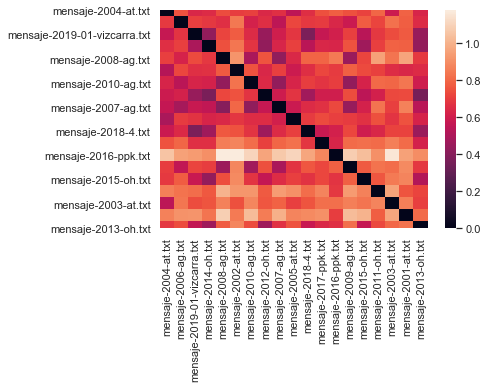

In [300]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

This is very interesting result:  
    Taking a look at the multidimentional scaling of the text, we see how close the "ag" (for Alan Garcia) speeches are within each other. The same for "at" or Alejandro Toledo, and somehow the same for "oh" or Ollanta Humala. 

Apart from this, it looks like that KS divergence finds more common patterns than the other meassures. 
    


//anaconda3/lib/python3.7/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


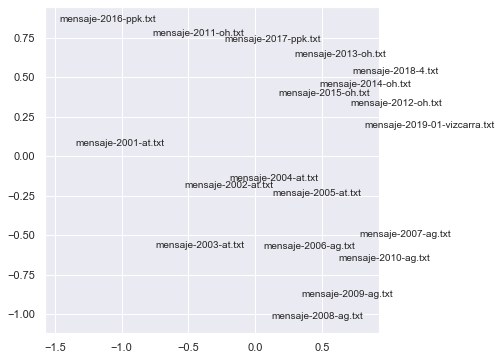

In [301]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

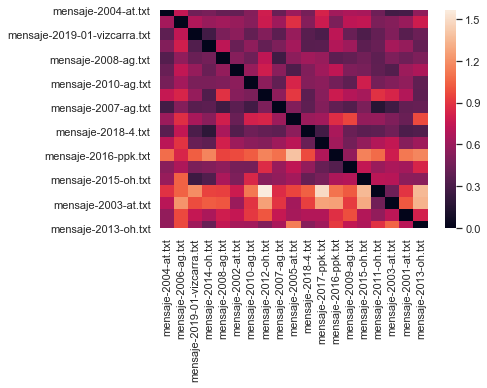

In [302]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

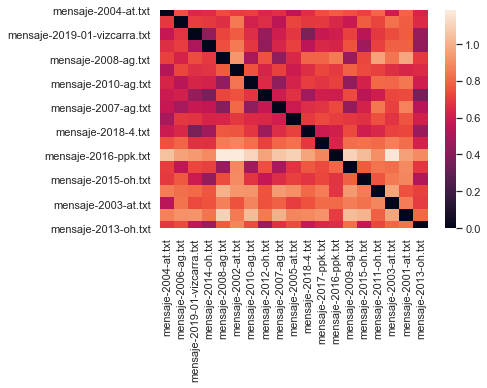

In [303]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

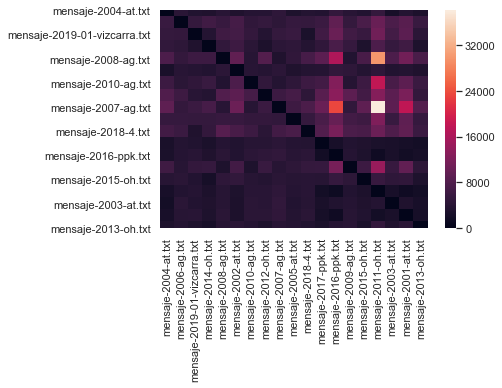

In [304]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

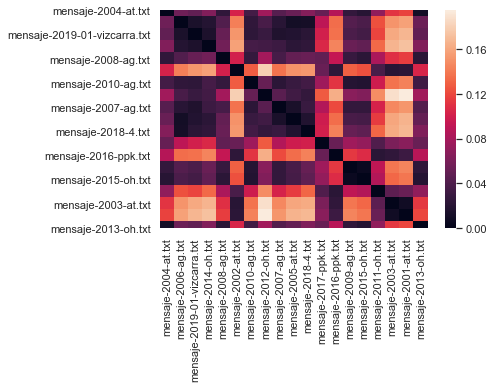

In [305]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

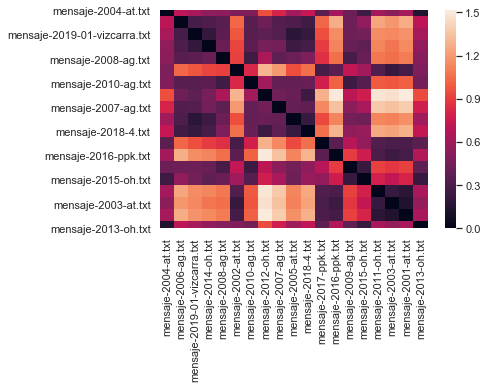

In [306]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

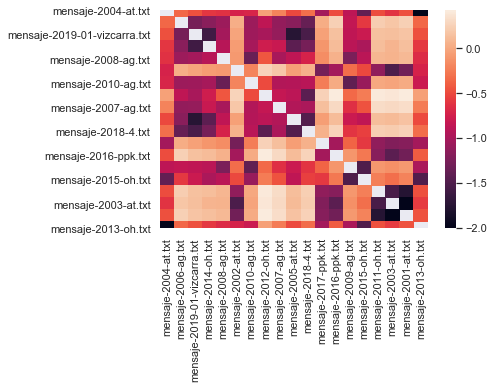

In [307]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()